# K-Means Clustering

## Pengertian K-Means

**K-Means** adalah salah satu algoritma unsupervised learning (pembelajaran tanpa pengawasan) yang digunakan untuk **pengelompokan data (clustering)**. Tujuannya adalah membagi data ke dalam **K kelompok (cluster)** berdasarkan kemiripan karakteristiknya, di mana **K** merupakan jumlah cluster yang ditentukan sebelumnya.

---

## Cara Kerja K-Means

1. **Menentukan Jumlah Cluster (K):**  
    Tentukan jumlah cluster yang diinginkan sesuai dengan kebutuhan analisis.  

2. **Inisialisasi Centroid:**  
    Pilih secara acak K titik awal sebagai centroid (pusat cluster).  

3. **Mengelompokkan Data ke Centroid Terdekat:**  
    - Hitung jarak setiap data ke masing-masing centroid (biasanya menggunakan jarak Euclidean).  
    - Kelompokkan data ke cluster dengan centroid terdekat.  

4. **Memperbarui Centroid:**  
    Hitung rata-rata posisi dari semua data dalam setiap cluster, lalu jadikan hasilnya sebagai centroid baru.  

5. **Iterasi:**  
    Ulangi langkah 3 dan 4 hingga salah satu kondisi berikut tercapai:  
    - Centroid tidak mengalami perubahan signifikan.  
    - Jumlah iterasi maksimum telah tercapai.  

---

## Keunggulan dan Kelemahan

**Keunggulan K-Means:**  
- Cepat dan efisien untuk data besar.  
- Mudah diimplementasikan.  
- Cocok untuk data numerik.  

**Kelemahan K-Means:**
- Harus menentukan K terlebih dahulu (bisa menggunakan Elbow Method atau Silhouette Analysis).  
- Sensitif terhadap centroid awal (solusi: K-Means++).  
- Tidak cocok untuk data kategorikal atau cluster yang tidak berbentuk bulat (non-globular).  

---

## Contoh Penerapan
- Segmentasi pelanggan berdasarkan perilaku belanja.  
- Pengelompokan dokumen berdasarkan topik.  
- Analisis citra (segmentasi warna).  


## Implementasi K-Means Menggunakan Dataset Iris

### Instalasi Library yang digunakan

In [ ]:
%%capture
%pip install pandas numpy matplotlib scikit-learn  -q
import numpy as np
import matplotlib.pyplot as plt




### Menghapus kolom 'class' dan 'id' karena tidak diperlukan untuk klastering

In [13]:
import pandas as pd
df = pd.read_csv("./property/default_iris_combined.csv")
data = df.drop(columns=["class","id"], inplace=False)
data.head()

,petal length,petal width,sepal length,sepal width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


In [21]:
from sklearn.preprocessing import StandardScaler
# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,petal length,petal width,sepal length,sepal width
0,-1.341272,-1.312977,-0.900681,1.032057
1,-1.341272,-1.312977,-1.143017,-0.124958
2,-1.398138,-1.312977,-1.385353,0.337848
3,-1.284407,-1.312977,-1.506521,0.106445
4,-1.341272,-1.312977,-1.021849,1.263460


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Menghitung SSE dan Silhouette Score untuk k=2 hingga k=4
sse = []
silhouette_scores = []
k_range = range(2, 5)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)

    # SSE
    sse.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

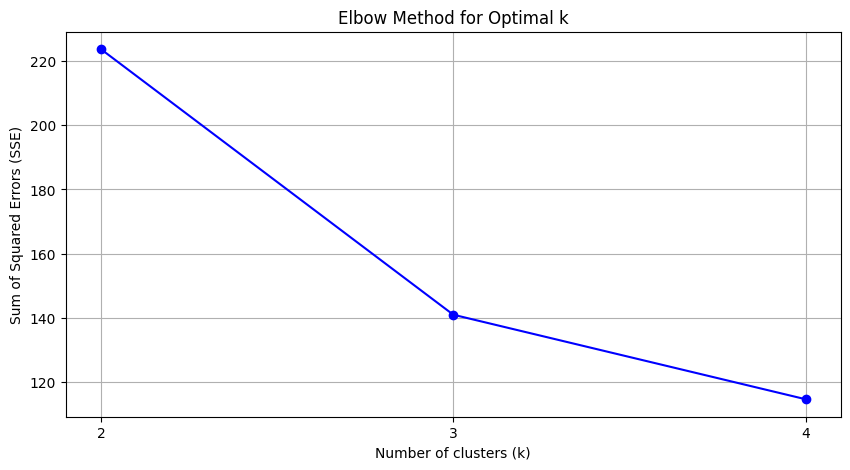

In [17]:
# Visualisasi SSE (Elbow Method)
plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid()
plt.show()

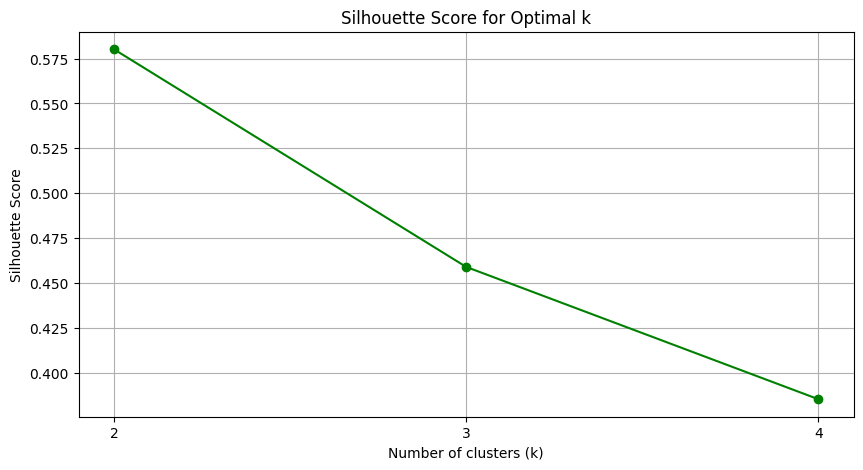

In [18]:
# Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range)
plt.grid()
plt.show()

In [19]:
# Menampilkan nilai SSE dan Silhouette Score
results = pd.DataFrame({
    'Number of Clusters': k_range,
    'SSE': sse,
    'Silhouette Score': silhouette_scores
})
results

,Number of Clusters,SSE,Silhouette Score
0,2,223.732006,0.580184
1,3,140.965817,0.458972
2,4,114.617886,0.385285


In [23]:
# Analisis klaster terbaik berdasarkan metrik
best_k = k_range[np.argmax(silhouette_scores)]
print(f"Jumlah klaster terbaik berdasarkan Silhouette Score: {best_k}")

# Melatih model dengan k terbaik
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
best_kmeans.fit(data_scaled)

Jumlah klaster terbaik berdasarkan Silhouette Score: 2


KMeans(n_clusters=2, n_init=10, random_state=42)

In [25]:
# Menambahkan label klaster ke data asli
df['cluster'] = best_kmeans.labels_
df

,id,class,petal length,petal width,sepal length,sepal width,cluster
0,1,Iris-setosa,1.4,0.2,5.1,3.5,1
1,2,Iris-setosa,1.4,0.2,4.9,3.0,1
2,3,Iris-setosa,1.3,0.2,4.7,3.2,1
3,4,Iris-setosa,1.5,0.2,4.6,3.1,1
4,5,Iris-setosa,1.4,0.2,5.0,3.6,1
...,...,...,...,...,...,...,...
145,146,Iris-virginica,5.2,2.3,6.7,3.0,0
146,147,Iris-virginica,5.0,1.9,6.3,2.5,0
147,148,Iris-virginica,5.2,2.0,6.5,3.0,0
148,149,Iris-virginica,5.4,2.3,6.2,3.4,0


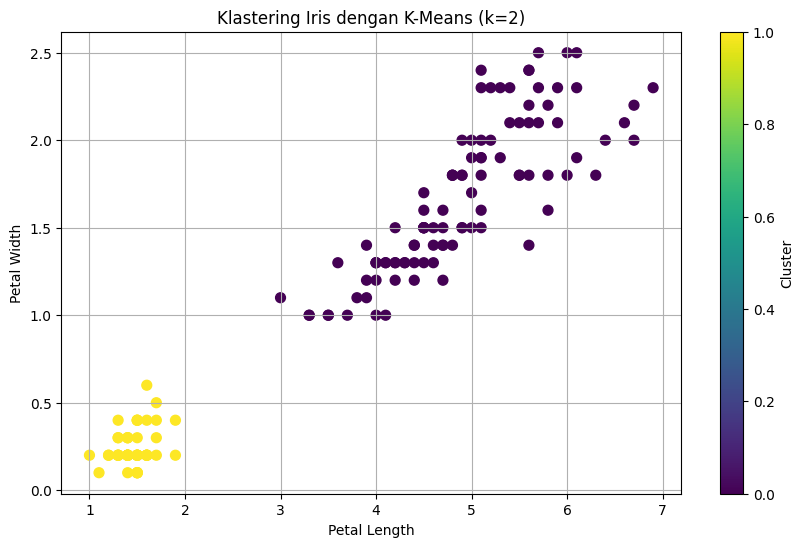

In [28]:
# Visualisasi klaster (contoh dengan 2 fitur)
plt.figure(figsize=(10, 6))
plt.scatter(data['petal length'], data['petal width'],
            c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title(f'Klastering Iris dengan K-Means (k={best_k})')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()